In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from newdust import *
from newdust import graindist
from newdust import extinction

In [3]:
EVALS = np.logspace(-1,1,30)
LAMVALS = np.linspace(1000.,8000., 100)

### How to construct a SingleGrainPop object

In [4]:
sgpop = SingleGrainPop(graindist.make_GrainDist('Powerlaw','Silicate'), 
                       extinction.make_Extinction('Mie'))
sgpop.calculate_ext(LAMVALS, unit='angs')

//anaconda/lib/python2.7/site-packages/newdust-0.1-py2.7.egg/newdust/extinction/scatmodels/miescat.py:201: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  d_n = d[:,:,n]


[]

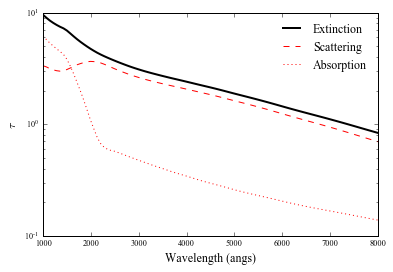

In [5]:
ax = plt.subplot(111)
sgpop.plot_ext(ax, 'all', loc='upper right', frameon=False)
plt.semilogy()

[]

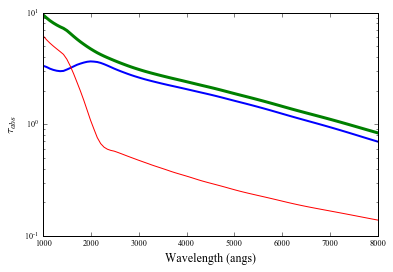

In [6]:
ax = plt.subplot(111)
sgpop.plot_ext(ax, 'ext', color='g', lw=3)
sgpop.plot_ext(ax, 'sca', color='b', lw=2)
sgpop.plot_ext(ax, 'abs', color='r', lw=1)
plt.semilogy()

## SingleGrainPop objects can be combined into a larger GrainPop

In [7]:
silpop = SingleGrainPop(graindist.make_GrainDist('Powerlaw','Silicate'), 
                       extinction.make_Extinction('Mie'))
grapop = SingleGrainPop(graindist.make_GrainDist('Powerlaw','Graphite'), 
                       extinction.make_Extinction('Mie'))

myPop  = GrainPop([silpop, grapop], keys=['sil','gra'])

In [8]:
myPop.calculate_ext(LAMVALS, unit='angs')

[]

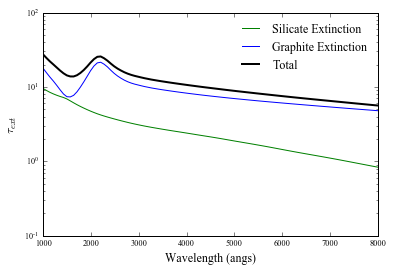

In [9]:
ax = plt.subplot(111)
myPop['sil'].plot_ext(ax, 'ext', color='g', label='Silicate Extinction')
myPop['gra'].plot_ext(ax, 'ext', color='b', label='Graphite Extinction')
myPop.plot_ext(ax, 'ext', color='k', lw=2, label='Total')
ax.legend(loc='upper right', frameon=False)
plt.semilogy()

In [10]:
myPop.info()



Grain Population: sil
Size distribution: Powerlaw
Extinction calculated with: Mie
Grain composition: Silicate
rho = 3.80 g cm^-3, M_d = 1.00e-04 g cm^-2


Grain Population: gra
Size distribution: Powerlaw
Extinction calculated with: Mie
Grain composition: Graphite
rho = 2.20 g cm^-3, M_d = 1.00e-04 g cm^-2


## Shortcut (helper) functions

In [11]:
NH = 1.e22 # cm^-2
MD = NH * 0.009 * constants.m_p

In [13]:
mrn = make_MRN(md=MD)
mrn.calculate_ext(LAMVALS, unit='angs')

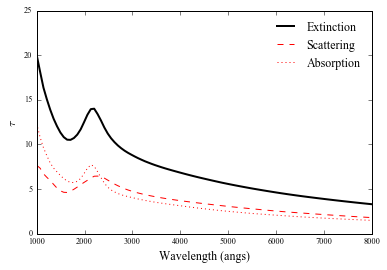

In [14]:
ax = plt.subplot(111)
mrn.plot_ext(ax, 'all', frameon=False)

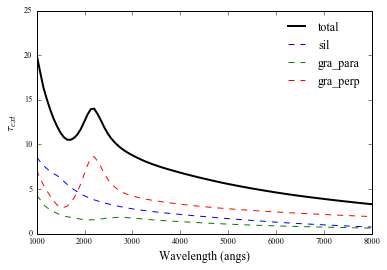

In [20]:
ax = plt.subplot(111)
mrn.plot_ext(ax, 'ext', color='k', lw=2, label='total')
for k in mrn.keys:
    mrn[k].plot_ext(ax, 'ext', ls='--', label=k)
ax.legend(loc='upper right', frameon=False)